### DESCRIPCIÓN DE VARIABLES

#### ID_EVENTO
**Descripción**: IDENTIFICADOR ÚNICO DEL EVENTO  
**Información Adicional**: Esta variable es creada únicamente con objetivo de facilitar el procesamiento de los datos. A los efectos de anonimizar la información, no se corresponde con ninguna variable administrativa que identifique el evento.  
**Tipo de Dato**: String  

#### DELITO
**Descripción**: TIPO DE DELITO  
**Información Adicional**: Indica el tipo de delito según la carátula con que está registrado en el Sistema de Gestión de Seguridad Pública. La categoría “LESIONES” incluye los delitos de Lesiones Personales (Artículo 316, CP), Lesiones Graves (Artículo 317, CP) y Lesiones Gravísimas (Artículo 318, CP).  
**Tipo de Dato**: String  

#### VICT_RAP
**Descripción**: TIPO DE VÍCTIMA EN RAPIÑAS  
**Información Adicional**: Esta variable refiere a los tipos de víctimas para el delito de Rapiña, para los demás delitos asume la categoría de “NO CORRESPONDE”.  
**Tipo de Dato**: String  

#### VICT_HUR
**Descripción**: TIPO DE VÍCTIMA EN HURTOS  
**Información Adicional**: Esta variable refiere a los tipos de víctimas para el delito de Hurto, para los demás delitos asume la categoría de “NO CORRESPONDE”.  
**Tipo de Dato**: String  

#### TENTATIVA
**Descripción**: EVENTO TENTATIVO  
**Información Adicional**: La categoría “SI” indica eventos tentativos. La categoría “NO” indica eventos consumados.  
**Tipo de Dato**: String  

#### FECHA
**Descripción**: FECHA DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: Date  

#### AÑO
**Descripción**: AÑO DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: Numeric  

#### MES
**Descripción**: MES DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: String  

#### SEMESTRE
**Descripción**: SEMESTRE DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: String  

#### TRIMESTRE
**Descripción**: TRIMESTRE DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: String  

#### DIA_SEMANA
**Descripción**: DÍA DE LA SEMANA DE OCURRENCIA DEL EVENTO  
**Información Adicional**:  
**Tipo de Dato**: String  

#### HORA
**Descripción**: HORA DE OCURRENCIA DEL EVENTO  
**Información Adicional**: Los delitos de Hurto y Abigeato no suelen ocurrir en presencia de la víctima, esto dificulta la posibilidad de conocer con precisión la hora en que ocurre el evento delictivo. Por tal motivo, para estos delitos no se presentan datos en esta variable. Los casos de hurtos a transeúntes (arrebatos) constituyen una excepción, dado que la presencia de las víctimas está asegurada, para estos eventos se reporta la hora de ocurrencia.  
**Tipo de Dato**: String  

#### DEPTO
**Descripción**: DEPARTAMENTO DONDE OCURRE EL EVENTO  
**Información Adicional**: Indica el Departamento donde ocurrió el evento delictivo tal como se registró al ingresar el caso en el Sistema de Gestión de Seguridad Pública.  
**Tipo de Dato**: String  

#### JURISDICCION
**Descripción**: SECCIONAL POLICIAL DE JURISDICCIÓN DEL EVENTO  
**Información Adicional**: Indica la Jurisdicción Policial donde ocurrió el evento delictivo tal como se registró al ingresar el caso en el Sistema de Gestión de Seguridad Pública. Es importante tener en cuenta que los límites administrativos de las jurisdicciones policiales han cambiado durante el período, generándose incluso nuevas jurisdicciones. Por tal motivo, no es recomendable efectuar comparaciones interanuales con esta variable sin conocer dichas modificaciones.  
**Tipo de Dato**: String  

#### BARRIO_MONTEVIDEO
**Descripción**: BARRIO DE MONTEVIDEO DONDE OCURRE EL EVENTO  
**Información Adicional**: Para los eventos delictivos ocurridos en el Departamento de Montevideo, indica el barrio donde sucedieron. Para los demás eventos asume la categoría de “NO CORRESPONDE”. Esta variable fue construida mediante georreferenciación, cruzando las coordenadas geográficas del evento con un shapefile de barrios elaborado por el Instituto Nacional de Estadísticas (https://www.gub.uy/instituto-nacional-estadistica/datos-y-estadisticas/estadisticas/mapas-vectoriales-ano-2011).  
**Tipo de Dato**: String  


In [179]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
# Carga de datos usando link de google drive
'''
import gdown
file_id = "1E_JwOdHKmFVzZgOPa8xABGLAc37RsHbW"
destination = "otros-delitos.csv"  # Nombre del archivo local
gdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)
'''


'\nimport gdown\nfile_id = "1E_JwOdHKmFVzZgOPa8xABGLAc37RsHbW"\ndestination = "otros-delitos.csv"  # Nombre del archivo local\ngdown.download(f"https://drive.google.com/uc?id={file_id}", destination, quiet=False)\n'

In [181]:
# Carga de datos
df = pd.read_csv('data\otros-delitos.csv', sep=';' , encoding='utf-8-sig')

<>:2: SyntaxWarning: invalid escape sequence '\o'
<>:2: SyntaxWarning: invalid escape sequence '\o'
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\305313348.py:2: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv('data\otros-delitos.csv', sep=';' , encoding='utf-8-sig')


In [182]:
df.head().T

,0,1,2,3,4
﻿ID_EVENTO,ABI161166,BAF181532,BBB27344,BBP141672,BDF45548
DELITO,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA,HURTO,LESIONES,VIOLENCIA DOMÉSTICA
VICT_RAP,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE
VICT_HUR,NO CORRESPONDE,NO CORRESPONDE,DE VEHICULO,NO CORRESPONDE,NO CORRESPONDE
TENTATIVA,NO,NO,NO,SI,NO
FECHA,01.01.2013,14.01.2013,01.01.2013,16.01.2013,01.01.2013
AÑO,2013,2013,2013,2013,2013
MES,ENERO,ENERO,ENERO,ENERO,ENERO
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR


### 1. EDA y DATA CLEANING

In [183]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
﻿ID_EVENTO,2206963,2206963,TPW1999952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DELITO,2206963,5,HURTO,1376642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VICT_RAP,2206963,12,NO CORRESPONDE,1934297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VICT_HUR,2206963,8,NO CORRESPONDE,830321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TENTATIVA,2206963,2,NO,2125703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA,2206963,4291,16.02.2020,778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AÑO,2206963.0,NaN,NaN,NaN,2018.536126,3.278818,2013.0,2016.0,2019.0,2021.0,2024.0
MES,2206963,12,ENERO,205049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEMESTRE,2206963,2,PRIMER SEMESTRE,1140258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIMESTRE,2206963,4,ENE-MAR,596589,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
# Show the unique values of the column 'DELITO'
df['DELITO'].unique()

array(['VIOLENCIA DOMÉSTICA', 'HURTO', 'LESIONES', 'RAPIÑA', 'ABIGEATO'],
      dtype=object)

In [185]:
# Show the unique values of the column 'BARRIO_MOONTEVIDEO'
df['BARRIO_MONTEVIDEO'].unique()

array(['POCITOS', 'ITUZAINGO', 'NO CORRESPONDE', 'LA TEJA',
       'COLON CENTRO Y NOROESTE', 'AIRES PUROS', 'CAPURRO, BELLA VISTA',
       'TRES CRUCES', 'CENTRO', 'LA COMERCIAL',
       'PQUE. BATLLE, V. DOLORES', 'PUNTA GORDA',
       'JARDINES DEL HIPODROMO', 'LAS CANTERAS', 'MALVIN NORTE', 'SAYAGO',
       'BUCEO', 'BAÑADOS DE CARRASCO', 'PUNTA CARRETAS',
       'MERCADO MODELO, BOLIVAR', 'UNION', 'CORDON',
       'VILLA GARCIA, MANGA RURAL', 'PRADO, NUEVA SAVONA', 'NUEVO PARIS',
       'CERRITO', 'CERRO', 'PTA. RIELES, BELLA ITALIA',
       'PASO DE LA ARENA', 'BELVEDERE', 'LA PALOMA, TOMKINSON',
       'CASAVALLE', 'VILLA ESPAÑOLA', 'TRES OMBUES, VICTORIA',
       'CASABO, PAJAS BLANCAS', 'MALVIN', 'MANGA', 'CARRASCO NORTE',
       'JACINTO VERA', 'LA BLANQUEADA', 'SIN CLASIFICAR',
       'LEZICA, MELILLA', 'PIEDRAS BLANCAS', 'LARRAÑAGA',
       'COLON SURESTE, ABAYUBA', 'CASTRO, P. CASTELLANOS',
       'FLOR DE MAROÑAS', 'PALERMO', 'ATAHUALPA', 'PASO DE LAS DURANAS',
       'PE

In [186]:
# Count the unique values of the column 'BARRIO_MONTEVIDEO'
df['BARRIO_MONTEVIDEO'].nunique()

64

### 1.1. MONTEVIDEO

In [187]:
# Create a copy of the DataFrame with only data from MONTEVIDEO
df_mvd = df[df['DEPTO'] == 'MONTEVIDEO'].copy()

In [188]:
df_mvd.head().T

,0,1,3,4,5
﻿ID_EVENTO,ABI161166,BAF181532,BBP141672,BDF45548,BFM40350
DELITO,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA,LESIONES,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA
VICT_RAP,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE
VICT_HUR,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE,NO CORRESPONDE
TENTATIVA,NO,NO,SI,NO,NO
FECHA,01.01.2013,14.01.2013,16.01.2013,01.01.2013,01.01.2013
AÑO,2013,2013,2013,2013,2013
MES,ENERO,ENERO,ENERO,ENERO,ENERO
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR


In [189]:
# Looking for missing values
df_mvd.isnull().sum()


ID_EVENTO           0
DELITO               0
VICT_RAP             0
VICT_HUR             0
TENTATIVA            0
FECHA                0
AÑO                  0
MES                  0
SEMESTRE             0
TRIMESTRE            0
DIA_SEMANA           0
HORA                 0
DEPTO                0
JURISDICCION         0
BARRIO_MONTEVIDEO    0
dtype: int64

In [190]:
df_mvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062823 entries, 0 to 2206962
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   ﻿ID_EVENTO         1062823 non-null  object
 1   DELITO             1062823 non-null  object
 2   VICT_RAP           1062823 non-null  object
 3   VICT_HUR           1062823 non-null  object
 4   TENTATIVA          1062823 non-null  object
 5   FECHA              1062823 non-null  object
 6   AÑO                1062823 non-null  int64 
 7   MES                1062823 non-null  object
 8   SEMESTRE           1062823 non-null  object
 9   TRIMESTRE          1062823 non-null  object
 10  DIA_SEMANA         1062823 non-null  object
 11  HORA               1062823 non-null  object
 12  DEPTO              1062823 non-null  object
 13  JURISDICCION       1062823 non-null  object
 14  BARRIO_MONTEVIDEO  1062823 non-null  object
dtypes: int64(1), object(14)
memory usage: 129.7+ MB


In [191]:
df_mvd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
﻿ID_EVENTO,1062823,1062823,TPW1999952,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DELITO,1062823,5,HURTO,650085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VICT_RAP,1062823,12,NO CORRESPONDE,842264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VICT_HUR,1062823,8,NO CORRESPONDE,412738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TENTATIVA,1062823,2,NO,1016045,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA,1062823,4291,02.03.2020,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AÑO,1062823.0,NaN,NaN,NaN,2018.608971,3.302302,2013.0,2016.0,2019.0,2021.0,2024.0
MES,1062823,12,MARZO,99974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEMESTRE,1062823,2,PRIMER SEMESTRE,549193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIMESTRE,1062823,4,ENE-MAR,283637,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
# Variable ID_EVENTO tiene caracteres especiales en su nombre
print(df_mvd.columns.tolist())


['\ufeffID_EVENTO', 'DELITO', 'VICT_RAP', 'VICT_HUR', 'TENTATIVA', 'FECHA', 'AÑO', 'MES', 'SEMESTRE', 'TRIMESTRE', 'DIA_SEMANA', 'HORA', 'DEPTO', 'JURISDICCION', 'BARRIO_MONTEVIDEO']


In [193]:
# Removiendo el caracteres no deseados de nombres de variables
df_mvd.columns = df_mvd.columns.str.replace('\ufeff', '')

In [194]:
# Chequeando que se hayan removido los caracteres no deseados
print(df_mvd.columns.tolist())

['ID_EVENTO', 'DELITO', 'VICT_RAP', 'VICT_HUR', 'TENTATIVA', 'FECHA', 'AÑO', 'MES', 'SEMESTRE', 'TRIMESTRE', 'DIA_SEMANA', 'HORA', 'DEPTO', 'JURISDICCION', 'BARRIO_MONTEVIDEO']


In [195]:
# Eliminando variables innecesarias
df_mvd.drop(columns=['ID_EVENTO', 'VICT_RAP', 'VICT_HUR', 'DEPTO'], inplace=True)

In [196]:
df_mvd.head().T

,0,1,3,4,5
DELITO,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA,LESIONES,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA
TENTATIVA,NO,NO,SI,NO,NO
FECHA,01.01.2013,14.01.2013,16.01.2013,01.01.2013,01.01.2013
AÑO,2013,2013,2013,2013,2013
MES,ENERO,ENERO,ENERO,ENERO,ENERO
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
DIA_SEMANA,MARTES,LUNES,MIERCOLES,MARTES,MARTES
HORA,0,8,1,19,0
JURISDICCION,SECCIONAL 10,SECCIONAL 16,SECCIONAL 19,SECCIONAL 21,SECCIONAL 12


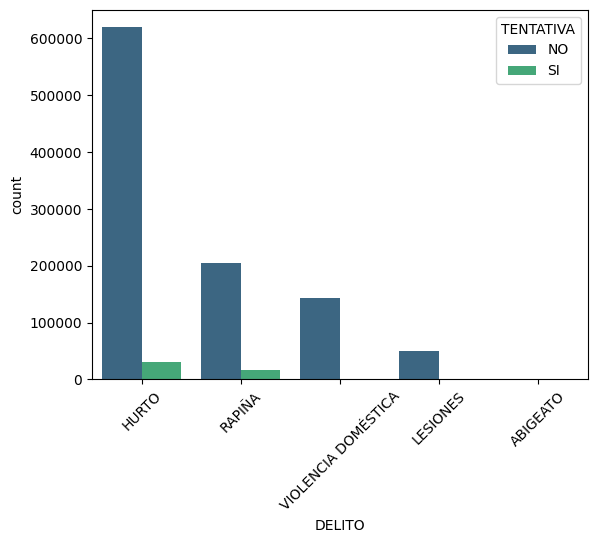

In [197]:
# Graficos de delitos en Montevideo

sns.countplot(data=df_mvd, x='DELITO', order=df_mvd['DELITO'].value_counts().index, hue= 'TENTATIVA', palette='viridis')
plt.xticks(rotation=45)
plt.show()

- La mayoria de delitos son hurtos y rapiñas y en su mayoría son crímenes consumados.
- Violencia doméstica ocurre en hogares deberíamos eliminarla? No porque aumentando el patrullaje se llegaría más rapido al lugar de la denuncia.
- Montevideo tiene una zona rural por eso figura algun Abigeato (robo de animales), igual son muy pocos


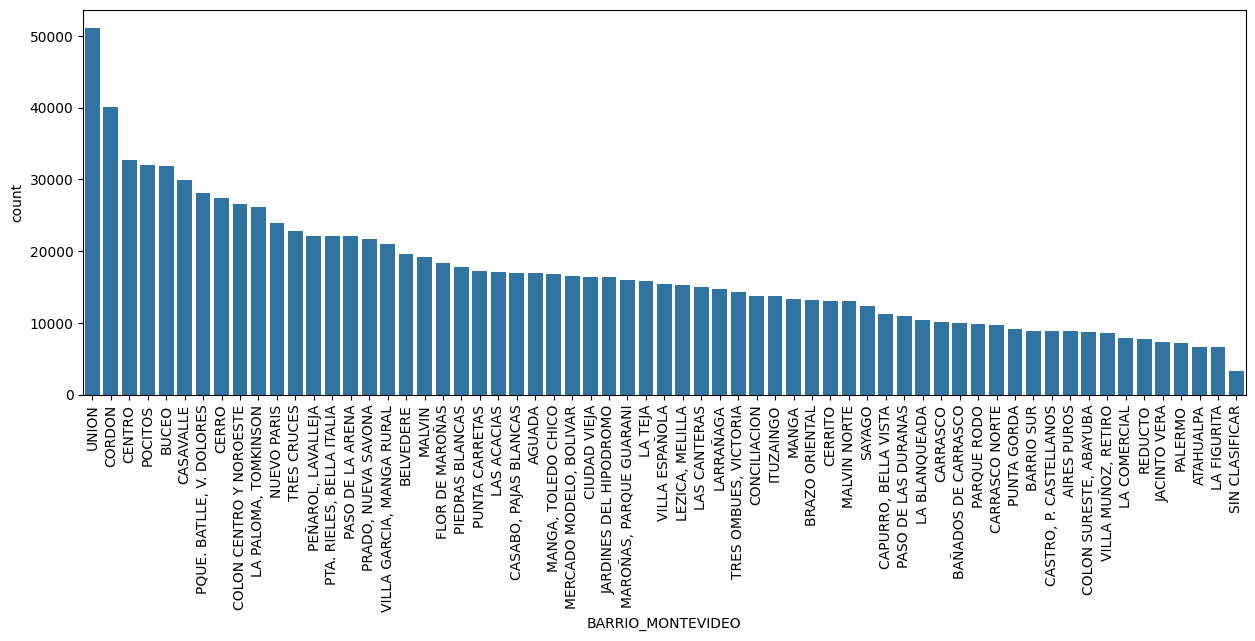

In [198]:
# Delitos por barrios de Montevideo
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd, x='BARRIO_MONTEVIDEO', order=df_mvd['BARRIO_MONTEVIDEO'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

- Hay algunos datos sin identificar barrio (SIN IDENTIFICAR), son muy pocos

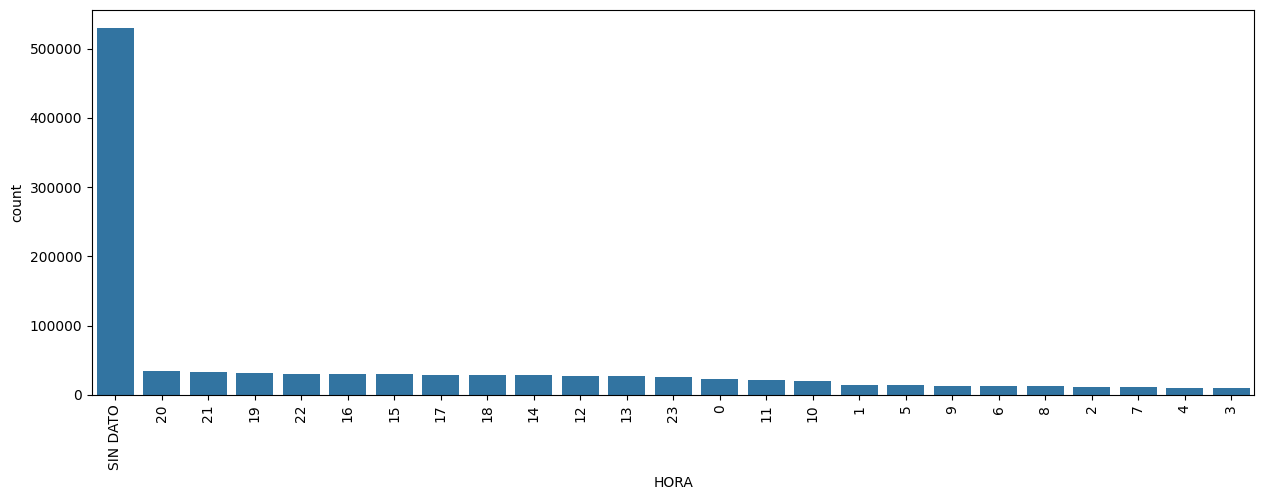

In [199]:
# Cantidad de delitos por hora

plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd, x='HORA', order=df_mvd['HORA'].value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.show()


- Aproximadamente la mitad de los registros no tienen hora asignada ya que los hurtos muchas veces no se sabe a que hora fueron.

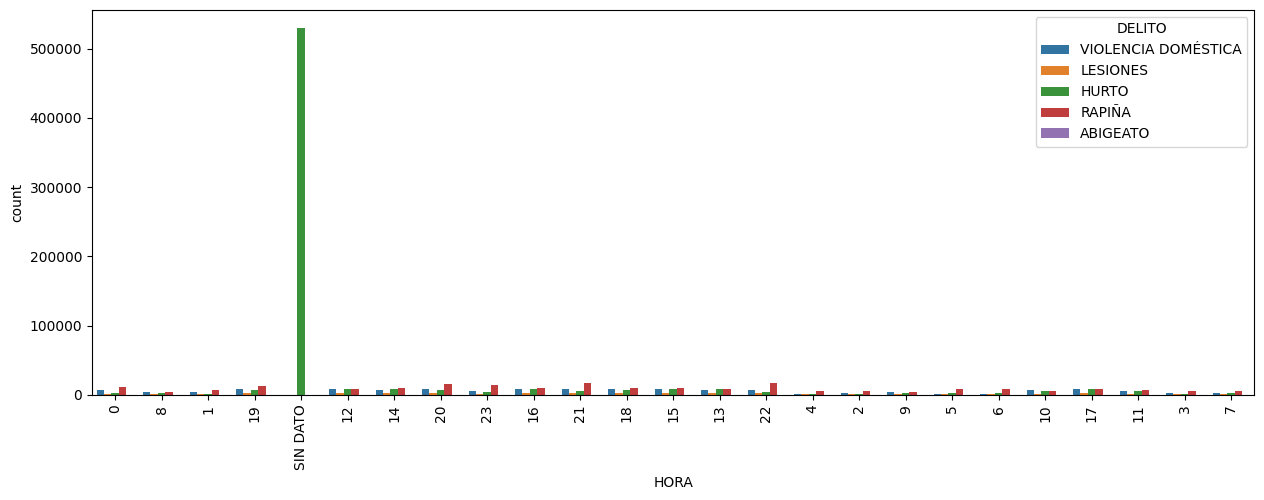

In [200]:
# Delitos por hora y tipo de delito
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd, x='HORA', hue='DELITO')
plt.xticks(rotation=90)
plt.show()

- Todos los delitos sin datos de hora son de hurtos.

In [201]:
# Transformando columna 'FECHA' a datetime
df_mvd['FECHA'] = pd.to_datetime(df_mvd['FECHA'], format='%d.%m.%Y')

In [202]:
# Chequeando columna 'FECHA' transformada
df_mvd['FECHA'].describe()

count                          1062823
mean     2019-02-04 15:39:14.944520192
min                2013-01-01 00:00:00
25%                2016-04-28 00:00:00
50%                2019-03-30 00:00:00
75%                2021-11-23 00:00:00
max                2024-09-30 00:00:00
Name: FECHA, dtype: object

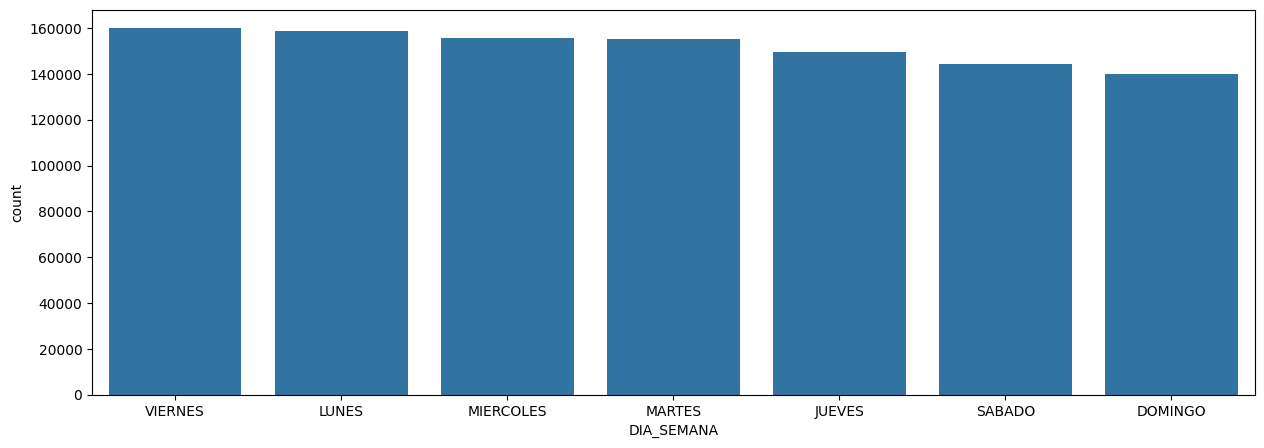

In [203]:
# Delitos por dia de la semana
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd, x='DIA_SEMANA', order=df_mvd['DIA_SEMANA'].value_counts().index)
plt.show()

- Los dias de fin de semama ocurren menor cantidad de delitos.

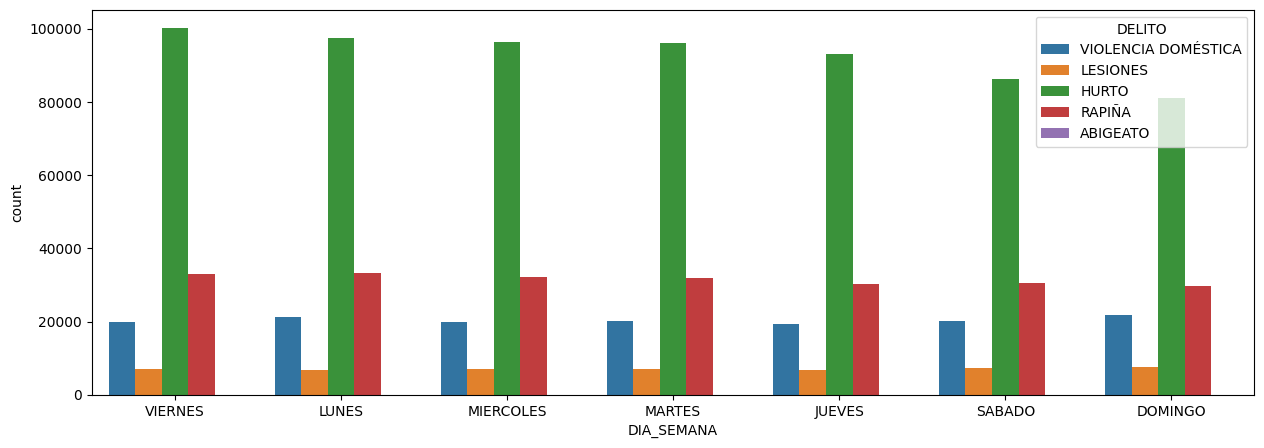

In [204]:
# Delitos por dia de la semana y tipo de delito
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd, x='DIA_SEMANA', order=df_mvd['DIA_SEMANA'].value_counts().index, hue='DELITO')
plt.show()

- No hay grandes diferencias en las proporciones de los delitos entrelos diferentes días de la semana.

C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\1813897351.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\1813897351.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\1813897351.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\1813897351.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotat

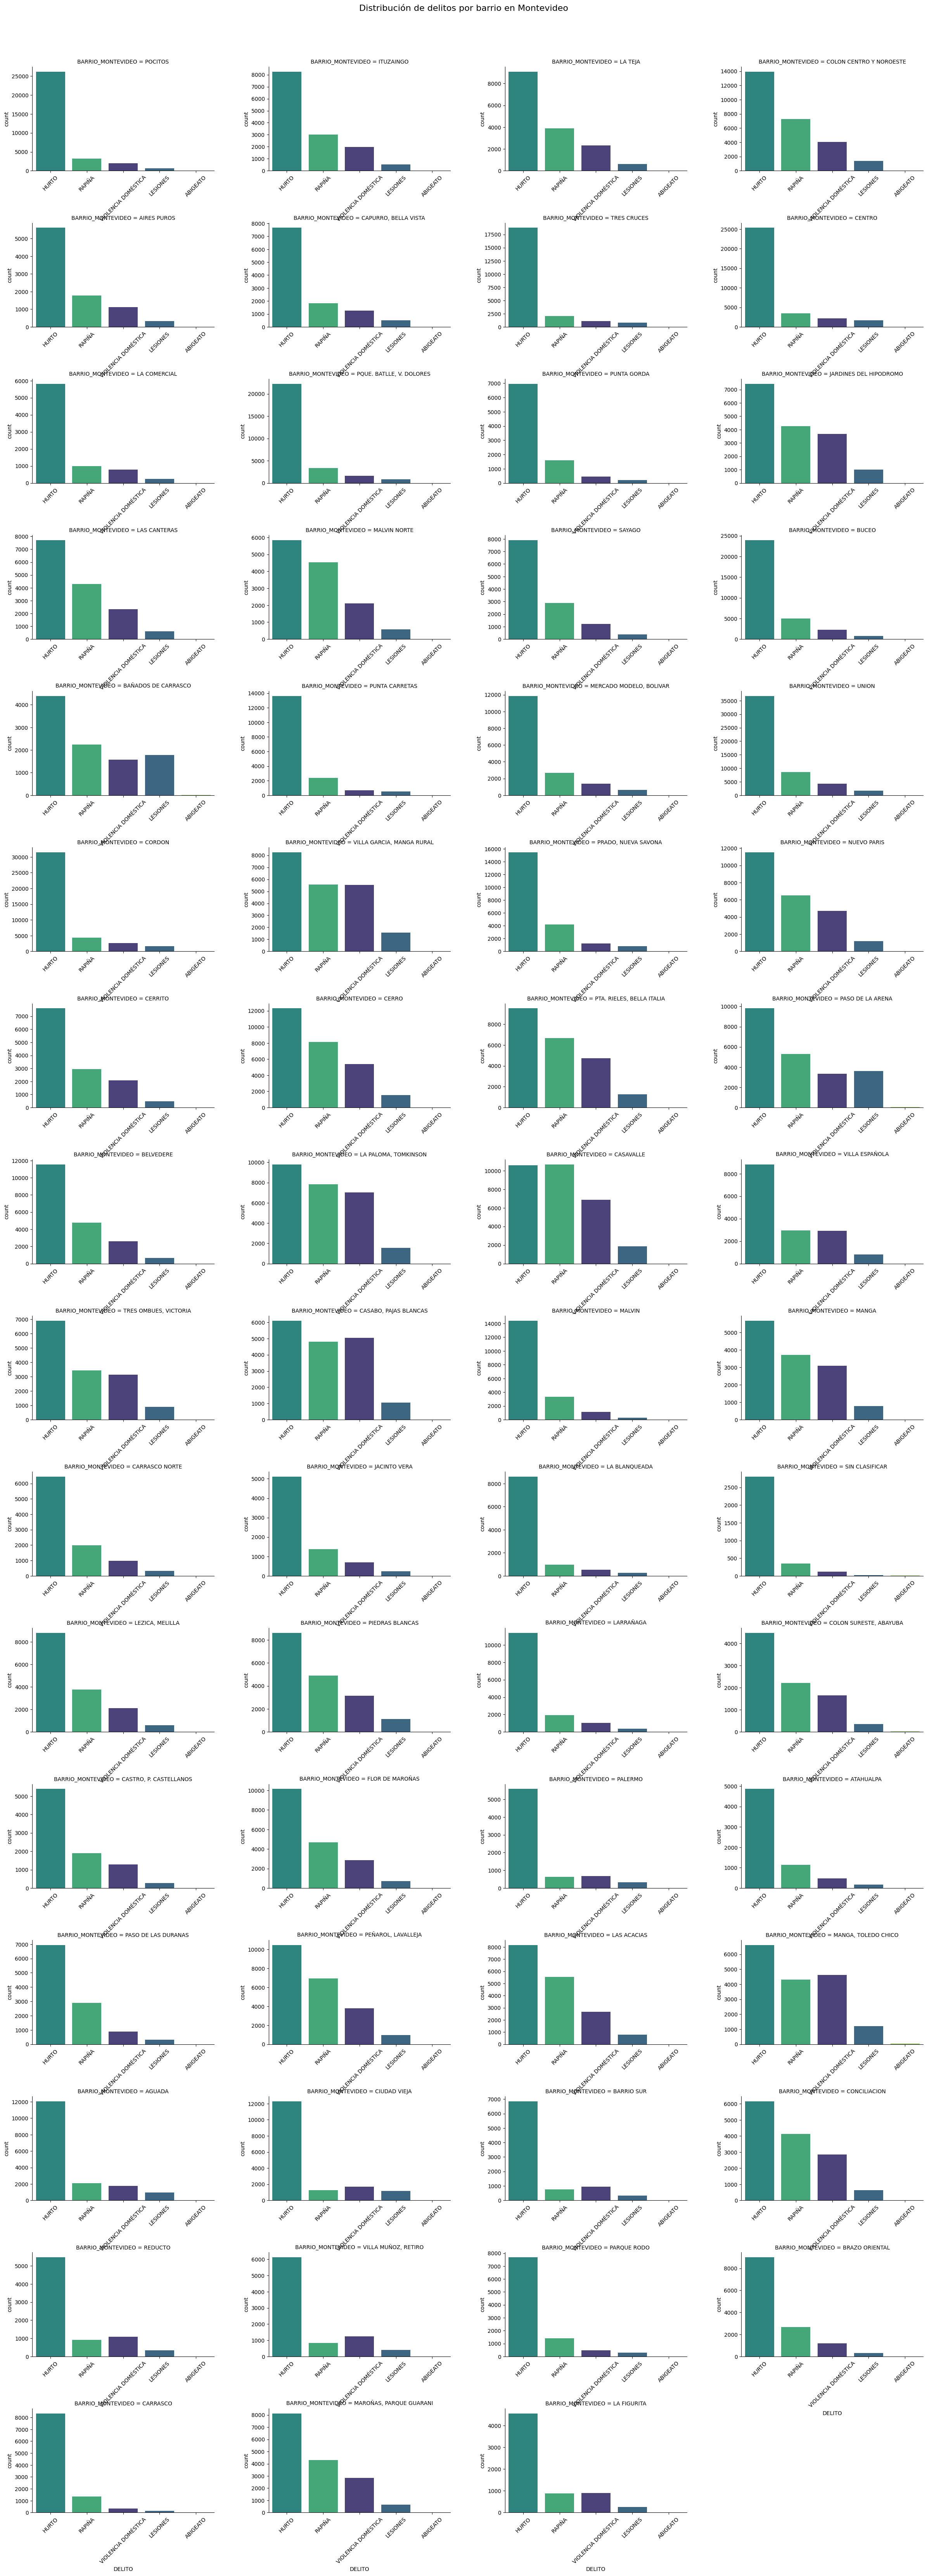

In [205]:
# Distribución de delitos por barrio en Montevideo
delito_orden = df_mvd['DELITO'].value_counts().index.tolist()

g = sns.FacetGrid(df_mvd, col="BARRIO_MONTEVIDEO", col_wrap=4, height=4, aspect=1.5, sharex=False, sharey=False)
g.map(sns.countplot, "DELITO", order=delito_orden, hue='DELITO', palette='viridis', data=df_mvd)

# Rotar las etiquetas de cada subgráfico
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajustar espaciado entre subgráficos
g.fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Agregar título general
g.fig.suptitle("Distribución de delitos por barrio en Montevideo", y=1.02, fontsize=16)

# Mostrar la figura
plt.show()


- En todos los barrios, el mayor delito es el hurto luego hay diferencias en rapiñas y violencia doméstica.
- En barrios de mayor poder adquisitivo, las rapiñas son el segundo delito mientras que en algunos de menor poder, la violencia doméstica llega a nieveles de rapiña.

### OBSERVACIONES:

- La mayoria de delitos son hurtos y rapiñas (hurtos violentos).
- La mayoría son delitos consumados.

- Violencia doméstica ocurre en hogares deberíamos eliminarla? No porque aumentando el patrullaje se llegaría más rapido al lugar de la denuncia.

- Montevideo tiene una zona rural por eso figura algun Abigeato (robo de animales), igual son muy pocos.
- Hay algunos datos sin identificar barrio (SIN IDENTIFICAR), son muy pocos.
- Aproximadamente la mitad de los registros no tienen hora asignada ya que los hurtos muchas veces no se sabe a que hora fueron.
- Los hurtos que tienen hora asignada son de hurtos a transeuntes.

- Los dias de fin de semama ocurren menor cantidad de delitos.

- En todos los barrios, el mayor delito es el hurto luego hay diferencias en rapiñas y violencia doméstica.
- En barrios de mayor poder adquisitivo, las rapiñas son el segundo delito mientras que en algunos de menor poder, la violencia doméstica llega a nieveles de rapiña.

In [206]:
df_mvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062823 entries, 0 to 2206962
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   DELITO             1062823 non-null  object        
 1   TENTATIVA          1062823 non-null  object        
 2   FECHA              1062823 non-null  datetime64[ns]
 3   AÑO                1062823 non-null  int64         
 4   MES                1062823 non-null  object        
 5   SEMESTRE           1062823 non-null  object        
 6   TRIMESTRE          1062823 non-null  object        
 7   DIA_SEMANA         1062823 non-null  object        
 8   HORA               1062823 non-null  object        
 9   JURISDICCION       1062823 non-null  object        
 10  BARRIO_MONTEVIDEO  1062823 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 97.3+ MB


#### TRATAMIENTO DE DATOS SIN HORA
- Si se eliminan delitos sin hora, se eliminan hurtos a viviendas, vehículos, etc cuando se dan sin la presencia del dueño.
- justificacion puede ser que el modelo de ML apuntaria ayudar a disminuir delitos de rapiñas, violencia y hurtos a transeuntes, por lo tanto eliminamos Abigeatos y Violéncia doméstica.


In [207]:
# Eliminando datos con hora SIN DATO 
df_mvd_red = df_mvd[(df_mvd['HORA'] != 'SIN DATO') & (df_mvd['DELITO'] != 'ABIGEATO')].copy()

In [208]:
df_mvd_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533480 entries, 0 to 2206959
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DELITO             533480 non-null  object        
 1   TENTATIVA          533480 non-null  object        
 2   FECHA              533480 non-null  datetime64[ns]
 3   AÑO                533480 non-null  int64         
 4   MES                533480 non-null  object        
 5   SEMESTRE           533480 non-null  object        
 6   TRIMESTRE          533480 non-null  object        
 7   DIA_SEMANA         533480 non-null  object        
 8   HORA               533480 non-null  object        
 9   JURISDICCION       533480 non-null  object        
 10  BARRIO_MONTEVIDEO  533480 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 48.8+ MB


- Quedan solamente **533.480 registros**

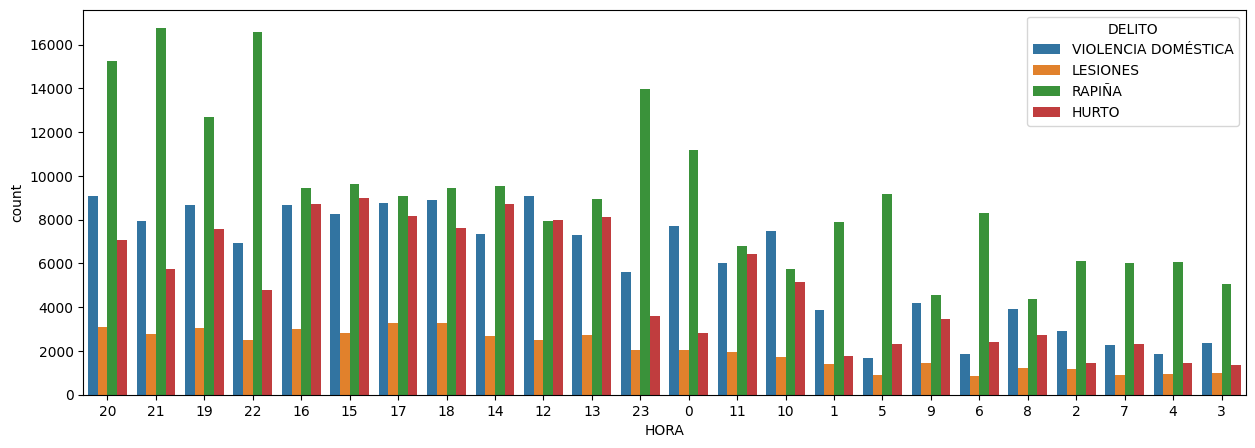

In [209]:
# Delitos por hora y tipo de delito
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd_red, x='HORA', order=df_mvd_red['HORA'].value_counts().index, hue='DELITO')
plt.show()

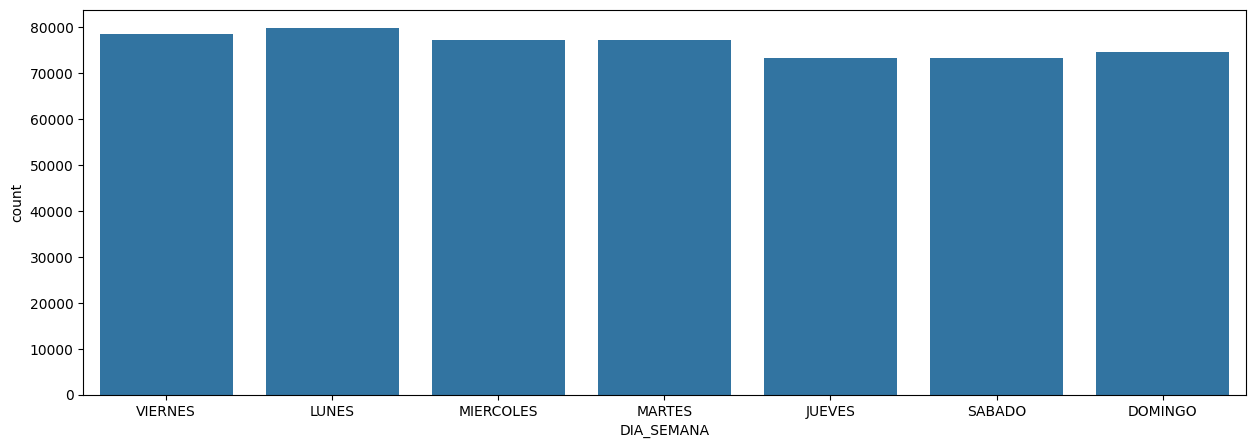

In [210]:
# Delitos por dia de la semana y tipo de delito
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd_red, x='DIA_SEMANA', order=df_mvd['DIA_SEMANA'].value_counts().index)
plt.show()

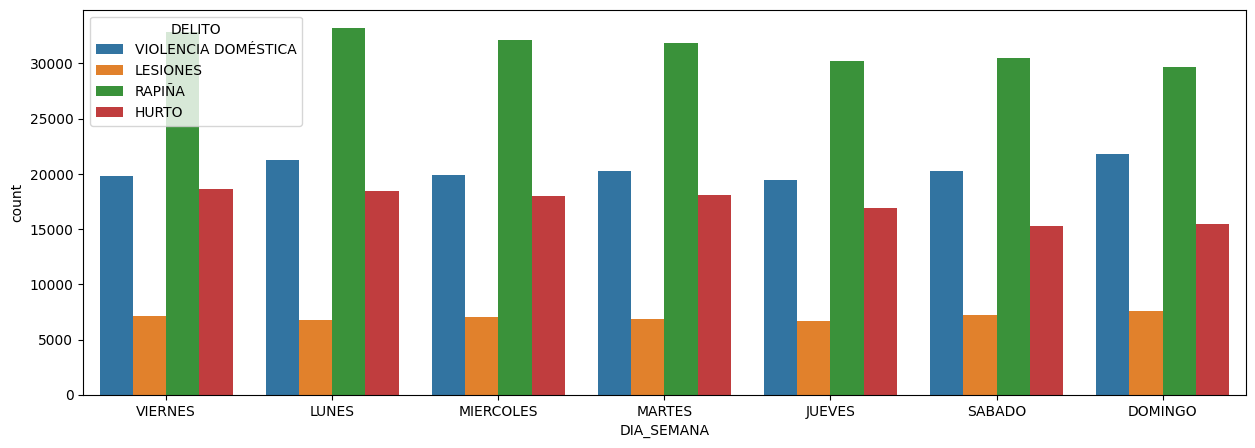

In [211]:
# Delitos por dia de la semana y tipo de delito
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd_red, x='DIA_SEMANA', order=df_mvd['DIA_SEMANA'].value_counts().index, hue='DELITO')
plt.show()

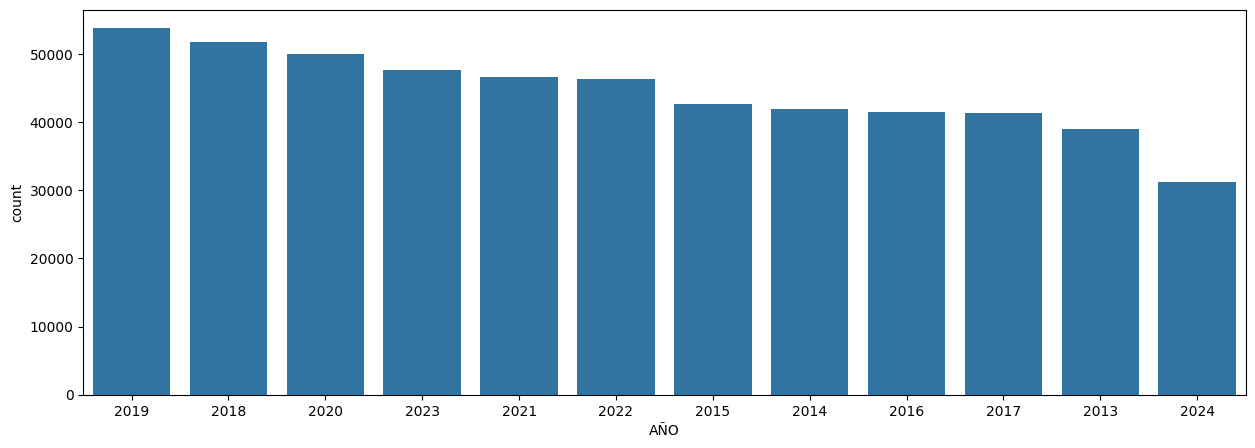

In [212]:
# Delitos por año
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd_red, x='AÑO', order=df_mvd_red['AÑO'].value_counts().index)
plt.show()

In [213]:
# Creando una nueva columna 'MES' con el numero del mes a partir de la columna 'FECHA'
df_mvd_red['MES_NUM'] = df_mvd_red['FECHA'].dt.month


In [214]:
df_mvd_red.head().T

,0,1,3,4,5
DELITO,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA,LESIONES,VIOLENCIA DOMÉSTICA,VIOLENCIA DOMÉSTICA
TENTATIVA,NO,NO,SI,NO,NO
FECHA,2013-01-01 00:00:00,2013-01-14 00:00:00,2013-01-16 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00
AÑO,2013,2013,2013,2013,2013
MES,ENERO,ENERO,ENERO,ENERO,ENERO
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
DIA_SEMANA,MARTES,LUNES,MIERCOLES,MARTES,MARTES
HORA,0,8,1,19,0
JURISDICCION,SECCIONAL 10,SECCIONAL 16,SECCIONAL 19,SECCIONAL 21,SECCIONAL 12


In [215]:
# Agrupando datos por año  mes, barrio, dia, hora etc.
df_mvd_red_grup = df_mvd_red.groupby(['AÑO', 'MES', 'BARRIO_MONTEVIDEO', 'DIA_SEMANA', 'HORA']).size().reset_index(name='count_delitos')

In [216]:
df_mvd_red_grup.describe()

,AÑO,count_delitos
count,405658.000000,405658.000000
mean,2018.516546,1.315098
std,3.317724,0.637813
min,2013.000000,1.000000
25%,2016.000000,1.000000
50%,2019.000000,1.000000
75%,2021.000000,1.000000
max,2024.000000,11.000000


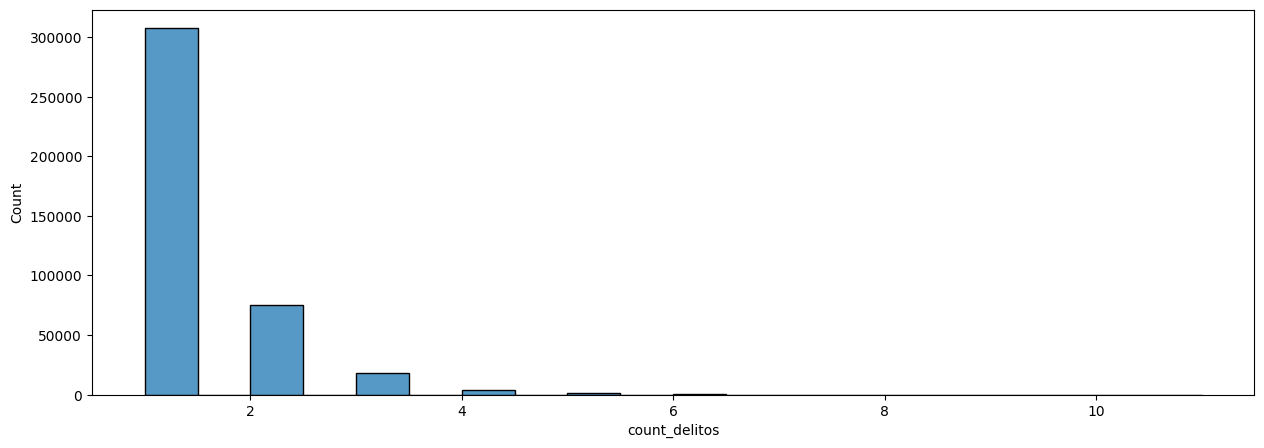

In [217]:
# histograma de count_delitos
plt.figure(figsize=(15, 5))
sns.histplot(data=df_mvd_red_grup, x='count_delitos', bins=20)
plt.show()


In [218]:
df_mvd_red_grup.head()

,AÑO,MES,BARRIO_MONTEVIDEO,DIA_SEMANA,HORA,count_delitos
0,2013,ABRIL,AGUADA,DOMINGO,12,2
1,2013,ABRIL,AGUADA,DOMINGO,15,1
2,2013,ABRIL,AGUADA,DOMINGO,20,1
3,2013,ABRIL,AGUADA,DOMINGO,23,1
4,2013,ABRIL,AGUADA,DOMINGO,3,1


- Quedan registros agrupados pero en su mayoría cada registro tiene 1 solo crimen
- Habría que agrupar por turno por ejemplo madrugada, mañana, tarde y noche


C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\985779430.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\985779430.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\985779430.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\usuario\AppData\Local\Temp\ipykernel_8968\985779430.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=

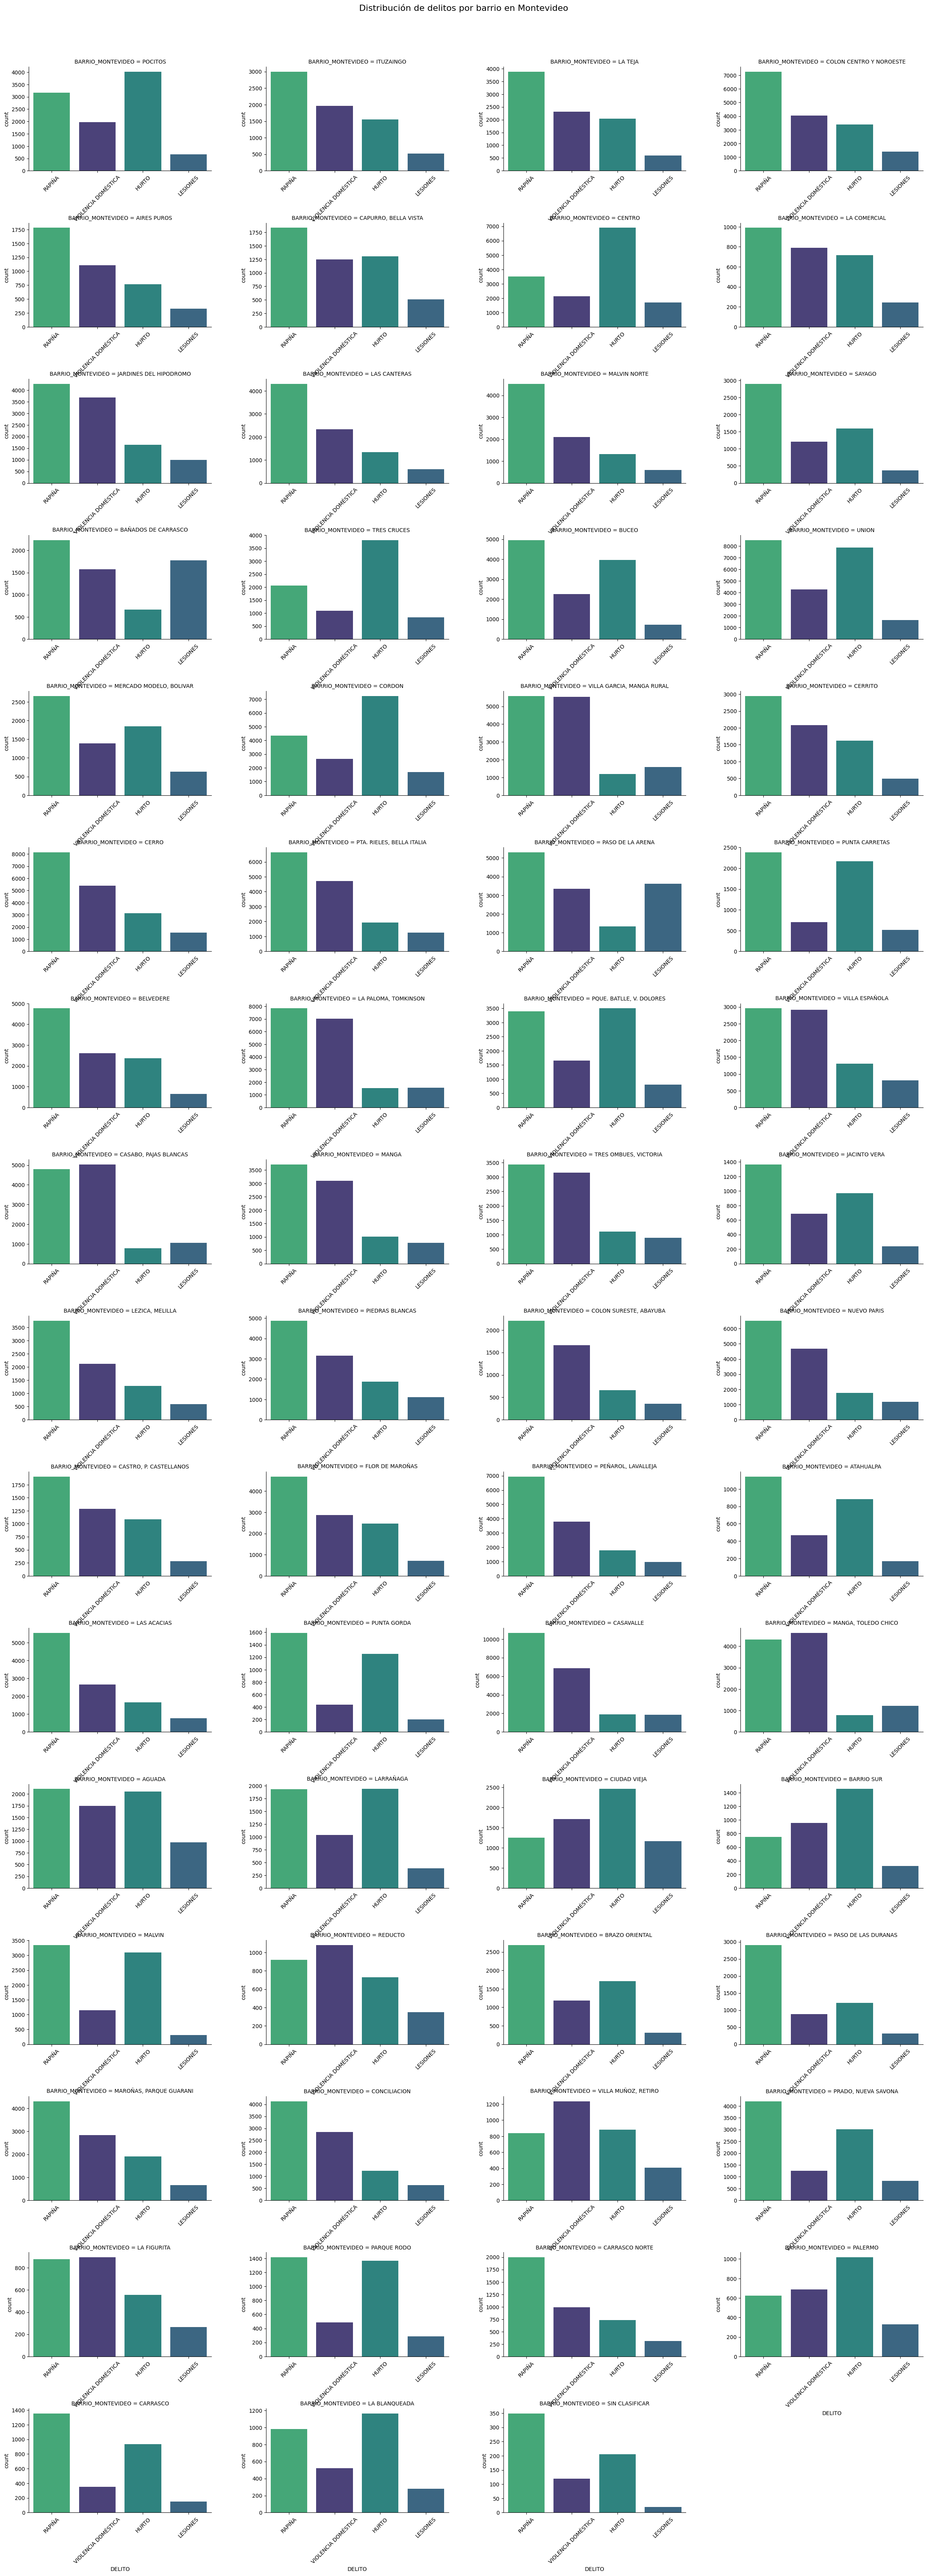

In [219]:
# Distribución de delitos por barrio en Montevideo
delito_orden = df_mvd_red['DELITO'].value_counts().index.tolist()

g = sns.FacetGrid(df_mvd_red, col="BARRIO_MONTEVIDEO", col_wrap=4, height=4, aspect=1.5, sharex=False, sharey=False)
g.map(sns.countplot, "DELITO", order=delito_orden, hue='DELITO', palette='viridis', data=df_mvd)

# Rotar las etiquetas de cada subgráfico
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ajustar espaciado entre subgráficos
g.fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Agregar título general
g.fig.suptitle("Distribución de delitos por barrio en Montevideo", y=1.02, fontsize=16)

# Mostrar la figura
plt.show()

In [220]:
# Función para asignar horario del día

def asignar_horario_dia(hora):
    if pd.isnull(hora):
        return np.nan
    if hora < 6:
        return 'Madrugada'
    elif hora < 12:
        return 'Mañana'
    elif hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

In [221]:
# Convertir Hora a numérico, manejando errores
df_mvd_red['HORA'] = pd.to_numeric(df_mvd_red['HORA'], errors='coerce')

In [222]:
# Aplicar función asignar_horario_dia a la columna 'HORA'
df_mvd_red['HORARIO_DIA'] = df_mvd_red['HORA'].apply(asignar_horario_dia)

In [223]:
# Chequear la nueva columna 'HORARIO_DIA'
df_mvd_red['HORARIO_DIA'].value_counts()

HORARIO_DIA
Noche        184989
Tarde        171736
Mañana        92171
Madrugada     84584
Name: count, dtype: int64

- Hay más deltios por la tarde y noche que en mañana y madrugada

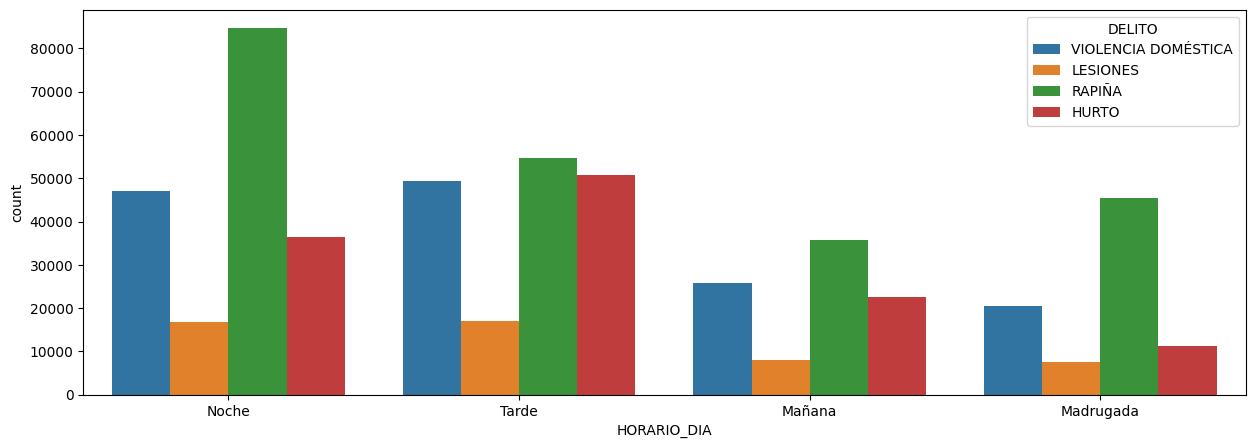

In [224]:
# Delitos por horario del día
plt.figure(figsize=(15, 5))
sns.countplot(data=df_mvd_red, x='HORARIO_DIA', order=df_mvd_red['HORARIO_DIA'].value_counts().index, hue='DELITO')
plt.show()

In [225]:
# Agrupando datos por barrio, HORARIO DEL DIA....
df_mvd_red_grup_2 = df_mvd_red.groupby(['AÑO', 'MES', 'BARRIO_MONTEVIDEO', 'DIA_SEMANA', 'HORARIO_DIA', 'SEMESTRE', 'TRIMESTRE']).size().reset_index(name='count_delitos')

In [226]:
df_mvd_red_grup_2.head()

,AÑO,MES,BARRIO_MONTEVIDEO,DIA_SEMANA,HORARIO_DIA,SEMESTRE,TRIMESTRE,count_delitos
0,2013,ABRIL,AGUADA,DOMINGO,Madrugada,PRIMER SEMESTRE,ABR-JUN,1
1,2013,ABRIL,AGUADA,DOMINGO,Noche,PRIMER SEMESTRE,ABR-JUN,2
2,2013,ABRIL,AGUADA,DOMINGO,Tarde,PRIMER SEMESTRE,ABR-JUN,3
3,2013,ABRIL,AGUADA,JUEVES,Mañana,PRIMER SEMESTRE,ABR-JUN,1
4,2013,ABRIL,AGUADA,JUEVES,Noche,PRIMER SEMESTRE,ABR-JUN,2


In [227]:
df_mvd_red_grup_2.describe()

,AÑO,count_delitos
count,186061.000000,186061.000000
mean,2018.437867,2.867232
std,3.359542,2.148656
min,2013.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2021.000000,4.000000
max,2024.000000,24.000000


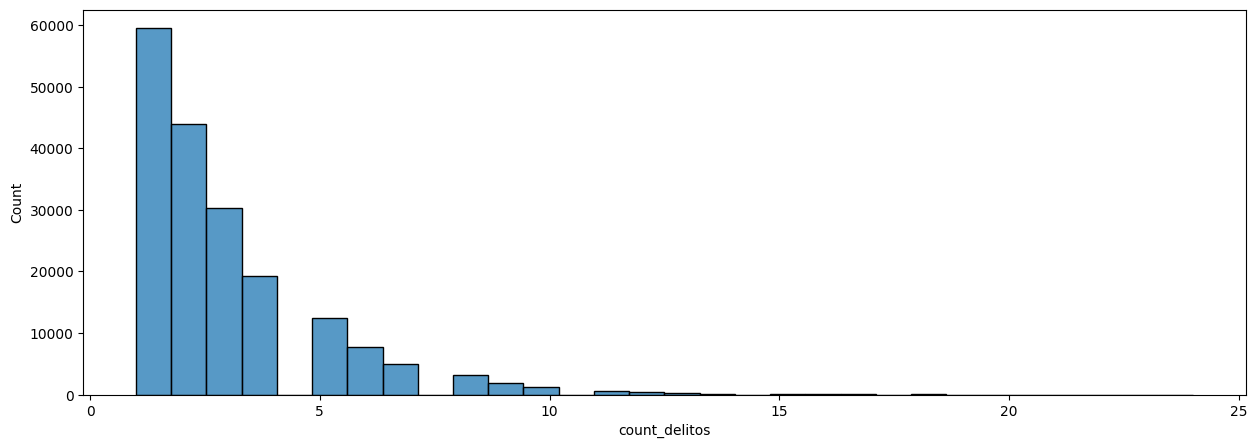

In [228]:
# Histograma de count_delitos
plt.figure(figsize=(15, 5))
sns.histplot(data=df_mvd_red_grup_2, x='count_delitos', bins=30)
plt.show()

In [229]:
# Agrupando datos por barrio, DIA....
df_mvd_red_grup_3 = df_mvd_red.groupby(['AÑO', 'MES', 'BARRIO_MONTEVIDEO', 'DIA_SEMANA', 'SEMESTRE', 'TRIMESTRE']).size().reset_index(name='count_delitos')

In [230]:
df_mvd_red_grup_3.head()

,AÑO,MES,BARRIO_MONTEVIDEO,DIA_SEMANA,SEMESTRE,TRIMESTRE,count_delitos
0,2013,ABRIL,AGUADA,DOMINGO,PRIMER SEMESTRE,ABR-JUN,6
1,2013,ABRIL,AGUADA,JUEVES,PRIMER SEMESTRE,ABR-JUN,7
2,2013,ABRIL,AGUADA,LUNES,PRIMER SEMESTRE,ABR-JUN,7
3,2013,ABRIL,AGUADA,MARTES,PRIMER SEMESTRE,ABR-JUN,9
4,2013,ABRIL,AGUADA,MIERCOLES,PRIMER SEMESTRE,ABR-JUN,10


In [231]:
df_mvd_red_grup_3.describe()

,AÑO,count_delitos
count,60609.000000,60609.000000
mean,2018.379333,8.801993
std,3.389802,6.150519
min,2013.000000,1.000000
25%,2015.000000,4.000000
50%,2018.000000,7.000000
75%,2021.000000,12.000000
max,2024.000000,49.000000


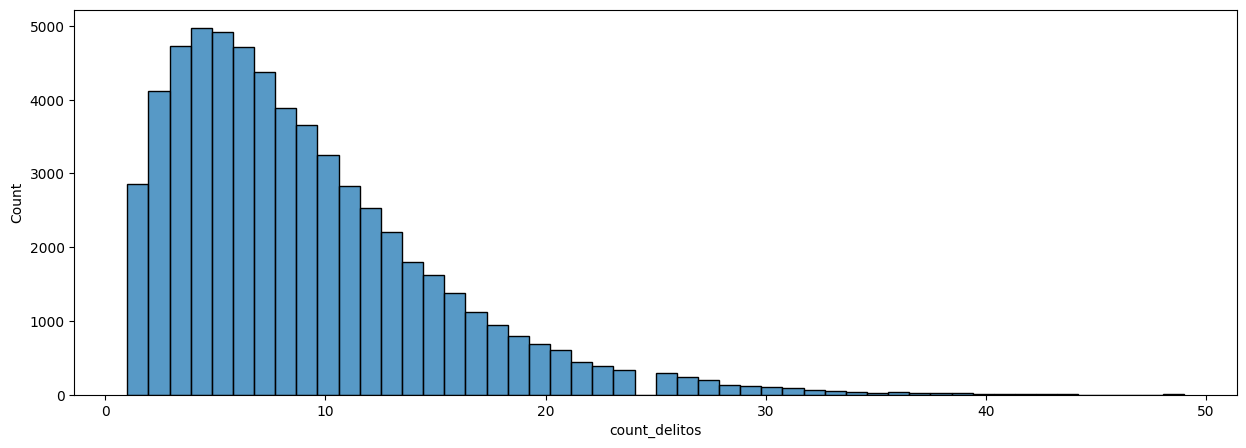

In [54]:
# Histograma de count_delitos
plt.figure(figsize=(15, 5))
sns.histplot(data=df_mvd_red_grup_3, x='count_delitos', bins=50)
plt.show()

- Lo mejor sería que la menor granulosidad sea por día para tener un mayor número de crímenes
- De esta forma se pueden usar los delitos sin fecha

### Agruparemos por día 
### Usamos todos los delitos incluyendo los sin hora registrada

In [177]:
df_mvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1062823 entries, 0 to 2206962
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   DELITO             1062823 non-null  object
 1   TENTATIVA          1062823 non-null  object
 2   FECHA              1062823 non-null  object
 3   AÑO                1062823 non-null  int64 
 4   MES                1062823 non-null  object
 5   SEMESTRE           1062823 non-null  object
 6   TRIMESTRE          1062823 non-null  object
 7   DIA_SEMANA         1062823 non-null  object
 8   HORA               1062823 non-null  object
 9   JURISDICCION       1062823 non-null  object
 10  BARRIO_MONTEVIDEO  1062823 non-null  object
dtypes: int64(1), object(10)
memory usage: 97.3+ MB


- Fecha está en formato string la transformamos en DateTime

In [232]:
# Transformando columna 'FECHA' a datetime
df_mvd['FECHA'] = pd.to_datetime(df_mvd['FECHA'], format='%d.%m.%Y')

In [233]:
# Creando una nueva columa numero del dia del mes
df_mvd['DIA_MES'] = df_mvd['FECHA'].dt.day

In [234]:
# Se crea nueva variable que indica semana del mes
df_mvd['SEMANA_MES'] = df_mvd['DIA_MES'].apply(lambda x: x // 7 + 1)

In [235]:
# Modificamos la columna 'MES' con el numero del mes a partir de la columna 'FECHA'
df_mvd['MES'] = df_mvd['FECHA'].dt.month

In [239]:
df_mvd.head()

,DELITO,TENTATIVA,FECHA,AÑO,MES,SEMESTRE,TRIMESTRE,DIA_SEMANA,HORA,JURISDICCION,BARRIO_MONTEVIDEO,DIA_MES,SEMANA_MES
0,VIOLENCIA DOMÉSTICA,NO,2013-01-01,2013,1,PRIMER SEMESTRE,ENE-MAR,MARTES,0,SECCIONAL 10,POCITOS,1,1
1,VIOLENCIA DOMÉSTICA,NO,2013-01-14,2013,1,PRIMER SEMESTRE,ENE-MAR,LUNES,8,SECCIONAL 16,ITUZAINGO,14,3
3,LESIONES,SI,2013-01-16,2013,1,PRIMER SEMESTRE,ENE-MAR,MIERCOLES,1,SECCIONAL 19,LA TEJA,16,3
4,VIOLENCIA DOMÉSTICA,NO,2013-01-01,2013,1,PRIMER SEMESTRE,ENE-MAR,MARTES,19,SECCIONAL 21,COLON CENTRO Y NOROESTE,1,1
5,VIOLENCIA DOMÉSTICA,NO,2013-01-01,2013,1,PRIMER SEMESTRE,ENE-MAR,MARTES,0,SECCIONAL 12,AIRES PUROS,1,1


In [237]:
# Agrupando datos por Barrio y día
df_mvd_group = df_mvd.groupby(['BARRIO_MONTEVIDEO','FECHA','AÑO','MES','DIA_MES','DIA_SEMANA','SEMANA_MES','SEMESTRE','TRIMESTRE']).size().reset_index(name='count_delitos')

- Cada fila corresponde a un dia en un barrio específico y se cuenta la cantidad de delitos.

In [240]:
df_mvd_group.head()

,BARRIO_MONTEVIDEO,FECHA,AÑO,MES,DIA_MES,DIA_SEMANA,SEMANA_MES,SEMESTRE,TRIMESTRE,count_delitos
0,AGUADA,2013-01-01,2013,1,1,MARTES,1,PRIMER SEMESTRE,ENE-MAR,2
1,AGUADA,2013-01-02,2013,1,2,MIERCOLES,1,PRIMER SEMESTRE,ENE-MAR,1
2,AGUADA,2013-01-03,2013,1,3,JUEVES,1,PRIMER SEMESTRE,ENE-MAR,1
3,AGUADA,2013-01-04,2013,1,4,VIERNES,1,PRIMER SEMESTRE,ENE-MAR,6
4,AGUADA,2013-01-05,2013,1,5,SABADO,1,PRIMER SEMESTRE,ENE-MAR,1


In [241]:
df_mvd_group.describe()

,FECHA,AÑO,MES,DIA_MES,SEMANA_MES,count_delitos
count,250346,250346.000000,250346.000000,250346.000000,250346.000000,250346.000000
mean,2018-11-26 23:26:12.061067264,2018.414071,6.416124,15.730888,2.831781,4.245416
min,2013-01-01 00:00:00,2013.000000,1.000000,1.000000,1.000000,1.000000
25%,2015-12-29 00:00:00,2015.000000,3.000000,8.000000,2.000000,2.000000
50%,2018-12-07 00:00:00,2018.000000,6.000000,16.000000,3.000000,4.000000
75%,2021-10-28 00:00:00,2021.000000,9.000000,23.000000,4.000000,6.000000
max,2024-09-30 00:00:00,2024.000000,12.000000,31.000000,5.000000,63.000000
std,NaN,3.380558,3.425750,8.799470,1.293092,2.970671


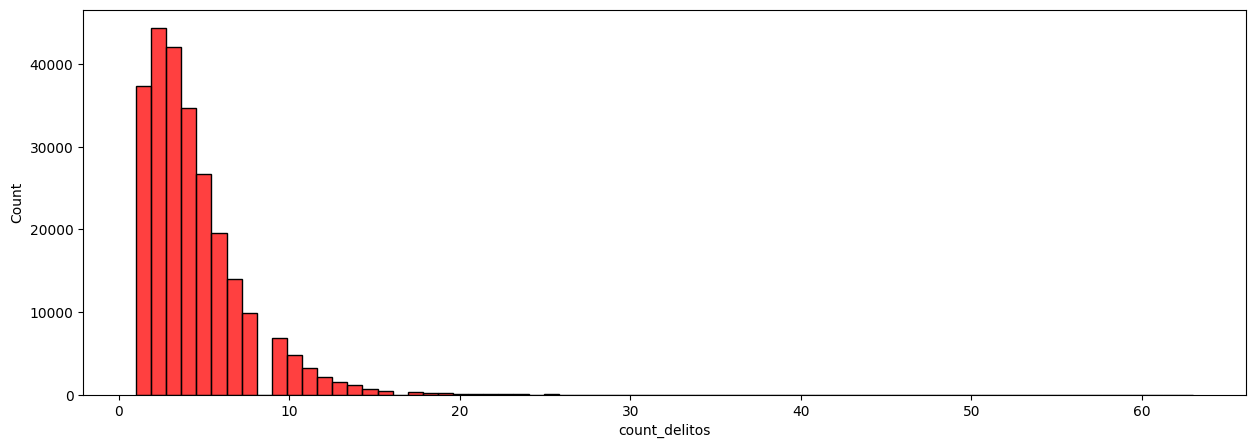

In [242]:
# Histograma de count_delitos
plt.figure(figsize=(15, 5))
sns.histplot(data=df_mvd_group, x='count_delitos', bins=70, color='red')
plt.show()

In [243]:
df_mvd_group['BARRIO_MONTEVIDEO'].value_counts()

BARRIO_MONTEVIDEO
UNION             4291
CORDON            4288
POCITOS           4287
BUCEO             4281
CASAVALLE         4280
                  ... 
JACINTO VERA      3470
PALERMO           3398
LA FIGURITA       3316
ATAHUALPA         3243
SIN CLASIFICAR    1899
Name: count, Length: 63, dtype: int64

- Hay 1899 datos con barrios sin especificar
- Se eliminan esos datos

In [244]:
df_mvd_group.drop(df_mvd_group[df_mvd_group['BARRIO_MONTEVIDEO'] == 'SIN CLASIFICAR'].index, inplace=True)

In [245]:
# Contando la cantidad de registros que quedan en el Dataset
df_mvd_group.shape

(248447, 10)

- Tenemos 248.447 registros de delitos agrupados.

#### Incorporación de datos de Poblacion por Barrio

- La variable TURISTICO es binaria, 1 cuando si, 0 cuando no

In [304]:
# Cargando los datos de poblacion por barrio
df_pob_barrios = pd.read_excel('data/Poblacion.xlsx')

In [333]:
# Primeras filas del DataFrame
df_pob_barrios.head(50)

,BARRIO_MONTEVIDEO,POBLACION,TURISTICO
0,POCITOS,69107,1
1,ITUZAINGO,12525,0
2,LA TEJA,18308,0
3,COLON CENTRO Y NOROESTE,26855,0
4,AIRES PUROS,14657,0
5,"CAPURRO, BELLA VISTA",16336,0
6,TRES CRUCES,16668,1
7,CENTRO,23335,1
8,LA COMERCIAL,11110,0
9,"PQUE. BATLLE, V. DOLORES",29474,0


In [306]:
# Información del DataFrame de población por barrios
df_pob_barrios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BARRIO_MONTEVIDEO  62 non-null     object
 1   POBLACION          62 non-null     int64 
 2   TURISTICO          62 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


- Están los datos de los 62 barrios de Montevideo

In [307]:
# Join de los DataFrames Delitos agrupados y Población por barrio
df_mvd_group_pob = df_mvd_group.merge(df_pob_barrios, on='BARRIO_MONTEVIDEO', how='left', suffixes=('_delitos', '_poblacion'), validate='many_to_one')

In [308]:
# Primeras filas del DataFrame con datos de delitos y población
df_mvd_group_pob.head()

,BARRIO_MONTEVIDEO,FECHA,AÑO,MES,DIA_MES,DIA_SEMANA,SEMANA_MES,SEMESTRE,TRIMESTRE,count_delitos,POBLACION,TURISTICO
0,AGUADA,2013-01-01,2013,1,1,MARTES,1,PRIMER SEMESTRE,ENE-MAR,2,19038,0
1,AGUADA,2013-01-02,2013,1,2,MIERCOLES,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0
2,AGUADA,2013-01-03,2013,1,3,JUEVES,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0
3,AGUADA,2013-01-04,2013,1,4,VIERNES,1,PRIMER SEMESTRE,ENE-MAR,6,19038,0
4,AGUADA,2013-01-05,2013,1,5,SABADO,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0


In [309]:
df_mvd_group_pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248447 entries, 0 to 248446
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   BARRIO_MONTEVIDEO  248447 non-null  object        
 1   FECHA              248447 non-null  datetime64[ns]
 2   AÑO                248447 non-null  int64         
 3   MES                248447 non-null  int32         
 4   DIA_MES            248447 non-null  int32         
 5   DIA_SEMANA         248447 non-null  object        
 6   SEMANA_MES         248447 non-null  int64         
 7   SEMESTRE           248447 non-null  object        
 8   TRIMESTRE          248447 non-null  object        
 9   count_delitos      248447 non-null  int64         
 10  POBLACION          248447 non-null  int64         
 11  TURISTICO          248447 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(5), object(4)
memory usage: 20.9+ MB


- Hay 248.447 registros, todos con su población correspondiente.

In [310]:
# Modificamos columa fecha para que incluya solo el año, mes y dia para hacer join con datos de clima
df_mvd_group_pob['FECHA'] = df_mvd_group_pob['FECHA'].dt.strftime('%Y-%m-%d')

In [311]:
# Chequeando que la columna 'FECHA' haya sido modificada correctamente
df_mvd_group_pob.head()

,BARRIO_MONTEVIDEO,FECHA,AÑO,MES,DIA_MES,DIA_SEMANA,SEMANA_MES,SEMESTRE,TRIMESTRE,count_delitos,POBLACION,TURISTICO
0,AGUADA,2013-01-01,2013,1,1,MARTES,1,PRIMER SEMESTRE,ENE-MAR,2,19038,0
1,AGUADA,2013-01-02,2013,1,2,MIERCOLES,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0
2,AGUADA,2013-01-03,2013,1,3,JUEVES,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0
3,AGUADA,2013-01-04,2013,1,4,VIERNES,1,PRIMER SEMESTRE,ENE-MAR,6,19038,0
4,AGUADA,2013-01-05,2013,1,5,SABADO,1,PRIMER SEMESTRE,ENE-MAR,1,19038,0


#### Incorporamos datos de clima obtenidos de VisualCrossing 

In [312]:
# Cargando datos de clima
df_clima = pd.read_csv('data/ClimaVisualCrossing/montevideo_clima_glob_clean.csv', sep=',')

In [313]:
# Primeras filas del DataFrame de clima
df_clima.head().T

,0,1,2,3,4
datetime,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-04
tempmax,23.0,25.5,30.5,30.2,23.8
tempmin,16.7,11.2,12.1,14.0,19.0
temp,19.3,18.6,20.7,22.0,21.3
feelslikemax,23.0,25.5,28.7,29.5,23.8
feelslikemin,16.7,11.2,12.1,14.0,19.0
feelslike,19.3,18.6,20.4,21.8,21.3
humidity,80.1,69.6,54.3,54.2,82.9
precip,0.0,0.0,0.0,0.0,0.3
windgust,42.5,24.8,35.3,39.2,34.9


In [314]:
# Uniendo los datasets de delitos y clima por columna 'FECHA', left join
df_mvd_group_pob_clima = df_mvd_group_pob.merge(df_clima, left_on='FECHA', right_on='fecha', how='left', suffixes=('_mvd_grup_pob', '_clima'), validate='many_to_one')

In [315]:
df_mvd_group_pob_clima.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,1,2,3,4,5
DIA_SEMANA,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
count_delitos,2,1,1,6,1


In [316]:
df_mvd_group_pob_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248447 entries, 0 to 248446
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BARRIO_MONTEVIDEO         248447 non-null  object 
 1   FECHA                     248447 non-null  object 
 2   AÑO                       248447 non-null  int64  
 3   MES                       248447 non-null  int32  
 4   DIA_MES                   248447 non-null  int32  
 5   DIA_SEMANA                248447 non-null  object 
 6   SEMANA_MES                248447 non-null  int64  
 7   SEMESTRE                  248447 non-null  object 
 8   TRIMESTRE                 248447 non-null  object 
 9   count_delitos             248447 non-null  int64  
 10  POBLACION                 248447 non-null  int64  
 11  TURISTICO                 248447 non-null  int64  
 12  datetime                  248447 non-null  object 
 13  tempmax                   248447 non-null  f

- Hay 248.447 Registros todos con sus datos de clima

#### Incroporacion de datos de Desempleo

In [317]:
# Cargamos datos de desempleo
df_desempleo = pd.read_csv('data/Desempleo_Mensual.csv')

In [318]:
df_desempleo.head()

,Ano,Mes,TasaPais,TasaMontevideo,TasaInterior
0,2006,1,13.20,12.34,13.84
1,2006,2,12.19,11.49,12.69
2,2006,3,11.80,12.51,11.26
3,2006,4,10.93,10.75,11.07
4,2006,5,10.52,10.43,10.59


In [319]:
df_desempleo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ano             225 non-null    int64  
 1   Mes             225 non-null    int64  
 2   TasaPais        225 non-null    float64
 3   TasaMontevideo  225 non-null    float64
 4   TasaInterior    225 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 8.9 KB


In [320]:
# Eliminando columnas innecesarias, Tasa Pais y Tasa Interior
df_desempleo.drop(columns=['TasaPais','TasaInterior'], inplace=True)

In [321]:
# Uniendo los datasets de delitos y desempleo por columna 'AÑO' y 'MES', left join
df_mvd_group_pob_clima_des = df_mvd_group_pob_clima.merge(df_desempleo, left_on=['AÑO', 'MES'], right_on=['Ano', 'Mes'], how='left', suffixes=('_mvd_grup_pob_clima', '_desempleo'), validate='many_to_one')

In [322]:
# Información del DataFrame
df_mvd_group_pob_clima_des.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,1,2,3,4,5
DIA_SEMANA,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
count_delitos,2,1,1,6,1


In [ ]:
df_mvd_group_pob_clima_des.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248447 entries, 0 to 248446
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BARRIO_MONTEVIDEO         248447 non-null  object 
 1   FECHA                     248447 non-null  object 
 2   AÑO                       248447 non-null  int64  
 3   MES                       248447 non-null  int32  
 4   DIA_MES                   248447 non-null  int32  
 5   DIA_SEMANA                248447 non-null  object 
 6   SEMANA_MES                248447 non-null  int64  
 7   SEMESTRE                  248447 non-null  object 
 8   TRIMESTRE                 248447 non-null  object 
 9   count_delitos             248447 non-null  int64  
 10  POBLACION                 248447 non-null  int64  
 11  TURISTICO                 248447 non-null  int64  
 12  datetime                  248447 non-null  object 
 13  tempmax                   248447 non-null  f

In [324]:
# Fecha, Ano y Mes están duplicadas, eliminamos una de ellas
df_mvd_group_pob_clima_des.drop(columns=['fecha', 'Ano', 'Mes', 'datetime'], inplace=True)

In [325]:
# Transformando todos los nombres de las variables a mayusculas
df_mvd_group_pob_clima_des.columns = df_mvd_group_pob_clima_des.columns.str.upper()

In [326]:
df_mvd_group_pob_clima_des.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,1,2,3,4,5
DIA_SEMANA,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,2,1,1,6,1


#### Normalizar cuenta de delitos y DF final

In [327]:
# Creando nueva columna COUNT_DELITOS_NORM que es la cantidad de delitos por cada 1000 habitantes por dia y barrio

df_mvd_group_pob_clima_des['COUNT_DELITOS_NORM'] = df_mvd_group_pob_clima_des['COUNT_DELITOS'] * 1000 / df_mvd_group_pob_clima_des['POBLACION']

In [328]:
# Describiendo la nueva variable COUNT_DELITOS_NORM 
df_mvd_group_pob_clima_des['COUNT_DELITOS_NORM'].describe()

count    248447.000000
mean          0.208154
std           0.121961
min           0.014470
25%           0.118140
50%           0.186498
75%           0.270416
max           3.294118
Name: COUNT_DELITOS_NORM, dtype: float64

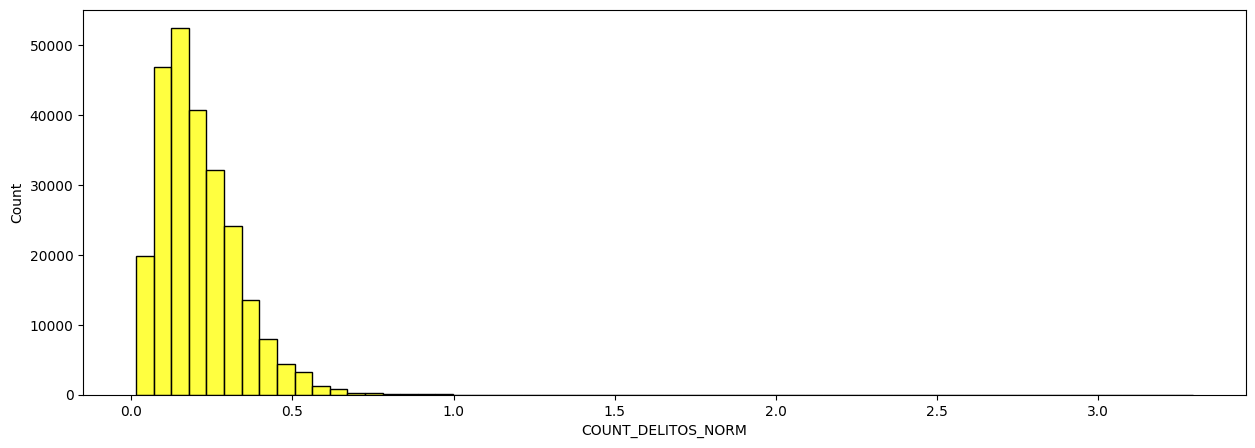

In [329]:
# Histograma de count_delitos_norm
plt.figure(figsize=(15, 5))
sns.histplot(data=df_mvd_group_pob_clima_des, x='COUNT_DELITOS_NORM', bins=60, color='Yellow')
plt.show()


#### Asignar etiqueta Bajo o Alto riesgo de delito

- Si el valor de COUNT_DELITOS_NORM es mayor a percentil 75 , se asigna Alto riesgo

In [330]:
# Asignando la etiqueta 'Alto' o 'Bajo' riesgo a la variable 'RIESGO' en función de un límite predefinido

limite = 0.270416 # 75 percentil, modificar según queramos definir el riesgo

# Funcion para asignar riesgo

def asignar_riesgo(count_delitos_norm):
    if count_delitos_norm > limite:
        return 'Alto'
    else:
        return 'Bajo'
    
# Aplicar función asignar_riesgo a la columna 'COUNT_DELITOS_NORM'
df_mvd_group_pob_clima_des['RIESGO'] = df_mvd_group_pob_clima_des['COUNT_DELITOS_NORM'].apply(asignar_riesgo)

In [331]:
df_mvd_group_pob_clima_des.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,1,2,3,4,5
DIA_SEMANA,MARTES,MIERCOLES,JUEVES,VIERNES,SABADO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,2,1,1,6,1


In [332]:
# Contando la cantidad de registros por riesgo
df_mvd_group_pob_clima_des['RIESGO'].value_counts()

RIESGO
Bajo    186154
Alto     62293
Name: count, dtype: int64

- Aproximadamente 1/4 de los datos son de alto riesgo